In [8]:

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.layers import GaussianNoise 
from keras import regularizers
import matplotlib.pyplot as plt


In [2]:

batch_size = 128
num_classes = 10
epochs = 10

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Define model ##
model = Sequential()

model.add(Flatten())
model.add(Dense(125, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=keras.optimizers.SGD(lr = 0.1),
               metrics=['accuracy'])

history = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.4683 - accuracy: 0.8571 - val_loss: 0.2257 - val_accuracy: 0.9336
Epoch 2/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.1811 - accuracy: 0.9458 - val_loss: 0.1463 - val_accuracy: 0.9564
Epoch 3/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.1311 - accuracy: 0.9605 - val_loss: 0.1210 - val_accuracy: 0.9641
Epoch 4/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.1025 - accuracy: 0.9691 - val_loss: 0.1128 - val_accuracy: 0.9653
Epoch 5/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.0824 - accuracy: 0.9752 - val_loss: 0.1033 - val_accuracy: 0.9694
Epoch 6/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.0712 - accurac

In [5]:
def plotAccuracy(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

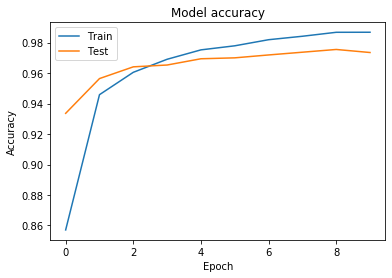

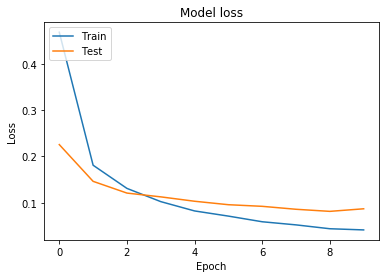

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 125)               98125     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               12600     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                510       
Total params: 116,285
Trainable params: 116,285
Non-trainable params: 0
_________________________________________________________________


In [4]:
plotAccuracy(history)
model.summary()

In [5]:
#from keras.utils import plot_model
#plot_model(model, to_file='model.png')

In [6]:
def runKeras(epochs, learningRate):
    batch_size = 128
    num_classes = 10

    # input image dimensions
    img_rows, img_cols = 28, 28

    # the data, split between train and test sets
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    if K.image_data_format() == 'channels_first':
        x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
        x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
        input_shape = (1, img_rows, img_cols)
    else:
        x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
        x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)

    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255

    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)

    ## Define model ##
    model = Sequential()

    model.add(Flatten())
    model.add(Dense(100, activation = 'relu'))
    model.add(Dense(num_classes, activation='softmax'))


    model.compile(loss=keras.losses.categorical_crossentropy,
                   optimizer=keras.optimizers.SGD(lr = learningRate),
                   metrics=['accuracy'])

    history = model.fit(x_train, y_train,
               batch_size=batch_size,
               epochs=epochs,
               verbose=0,
               validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))
    return (history, score[1], score[0])

Test loss: 0.07262826476083137, Test accuracy 0.9775999784469604


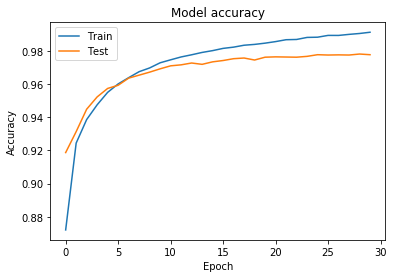

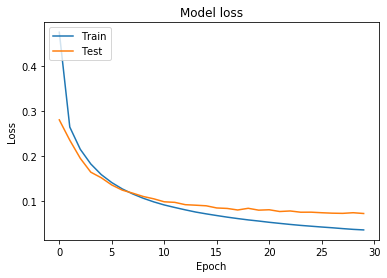

In [7]:
plotAccuracy(runKeras(30, 0.1)[0])


In [8]:
accuracyL = []
lr = []
for i in range(1001):
    num = i/1000
    print(num)
    
    accuracyL.append(runKeras(10, num)[1])
    lr.append(num)
    
    accuracyL.append(runKeras(10, num)[1])
    lr.append(num)
    
    accuracyL.append(runKeras(10, num)[1])
    lr.append(num)


0.0
Test loss: 2.2898236743927, Test accuracy 0.10740000009536743
Test loss: 2.3525283767700196, Test accuracy 0.12770000100135803
Test loss: 2.407955079650879, Test accuracy 0.09220000356435776
0.001


KeyboardInterrupt: 

In [11]:
def guassianNoise(noise):
    batch_size = 128
    num_classes = 10
    epochs = 10

    # input image dimensions
    img_rows, img_cols = 28, 28

    # the data, split between train and test sets
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    if K.image_data_format() == 'channels_first':
        x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
        x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
        input_shape = (1, img_rows, img_cols)
    else:
        x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
        x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)

    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255

    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)

    ## Define model ##
    model = Sequential()

    
   # model.add(GaussianNoise(noise))
    model.add(Flatten())
    model.add(GaussianNoise(noise))
    model.add(Dense(100, activation = 'relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
                   optimizer=keras.optimizers.SGD(lr = 0.1),
                   metrics=['accuracy'])

    history = model.fit(x_train, y_train,
               batch_size=batch_size,
               epochs=epochs,
               verbose=0,
               validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    plotAccuracy(history)
    print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

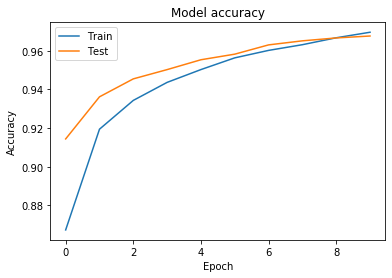

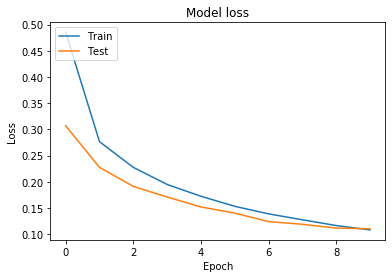

Test loss: 0.1105941816329956, Test accuracy 0.9677000045776367


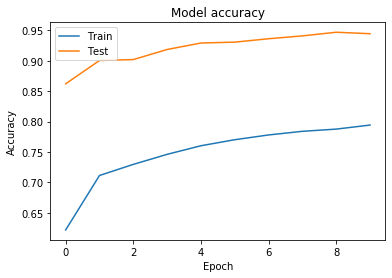

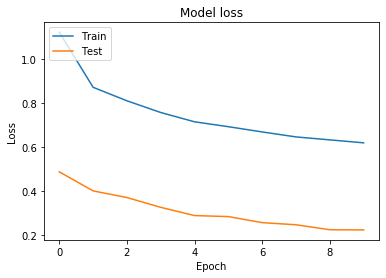

Test loss: 0.2244604104578495, Test accuracy 0.9447000026702881


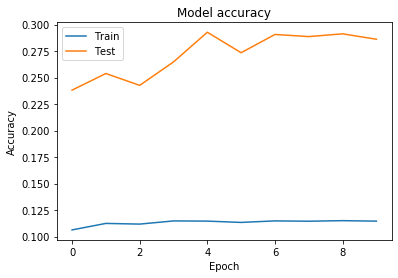

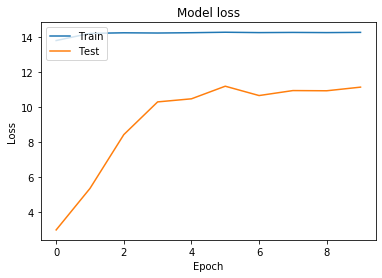

Test loss: 11.142108015441895, Test accuracy 0.28610000014305115


In [12]:
guassianNoise(0.1)
guassianNoise(1)
guassianNoise(10)

In [ ]:
#kernel_regularizer=regularizers.l2(0.01)

In [9]:
def regularizer(reg):
    batch_size = 128
    num_classes = 10
    epochs = 10

    # input image dimensions
    img_rows, img_cols = 28, 28

    # the data, split between train and test sets
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    if K.image_data_format() == 'channels_first':
        x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
        x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
        input_shape = (1, img_rows, img_cols)
    else:
        x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
        x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)

    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255

    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)

    ## Define model ##
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(100, activation = 'relu',kernel_regularizer=regularizers.l2(reg)))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
                   optimizer=keras.optimizers.SGD(lr = 0.1),
                   metrics=['accuracy'])

    history = model.fit(x_train, y_train,
               batch_size=batch_size,
               epochs=epochs,
               verbose=0,
               validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    plotAccuracy(history)
    print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


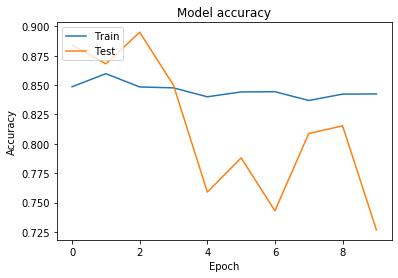

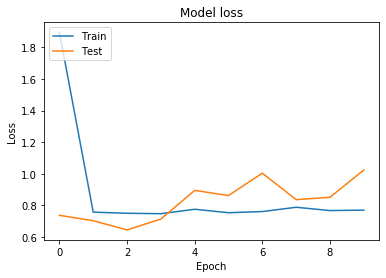

Test loss: 1.0243881747245789, Test accuracy 0.7267000079154968


In [10]:
regularizer(0.1)
regularizer(0.001)

In [11]:
def four():
    batch_size = 128
    num_classes = 10
    epochs = 10

    # input image dimensions
    img_rows, img_cols = 28, 28

    # the data, split between train and test sets
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    if K.image_data_format() == 'channels_first':
        x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
        x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
        input_shape = (1, img_rows, img_cols)
    else:
        x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
        x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)

    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255

    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)

    ## Define model ##
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
                   optimizer=keras.optimizers.SGD(lr = 0.1),
                   metrics=['accuracy'])

    history = model.fit(x_train, y_train,
               batch_size=batch_size,
               epochs=epochs,
               verbose=0,
               validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    plotAccuracy(history)
    print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

In [ ]:
four()

In [ ]:
def four()B:
    batch_size = 128
    num_classes = 10
    epochs = 10

    # input image dimensions
    img_rows, img_cols = 28, 28

    # the data, split between train and test sets
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    if K.image_data_format() == 'channels_first':
        x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
        x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
        input_shape = (1, img_rows, img_cols)
    else:
        x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
        x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)

    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255

    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)

    ## Define model ##
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
                   optimizer=keras.optimizers.SGD(lr = 0.1),
                   metrics=['accuracy'])

    history = model.fit(x_train, y_train,
               batch_size=batch_size,
               epochs=epochs,
               verbose=0,
               validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    plotAccuracy(history)
    print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))